# Demo: Nonloc heatflux

This notebook provide a demo case on the application of the heat conduction solver.
<br>

First, import parameter module in order to get a Pandas series containing all the parameters.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import parameter as param
import heatConduction as hc
import numpy as np
%matplotlib widget


All parameters of the problem, such as number of used profiles points, boundary conditions, definition of parameters $\alpha$ and $\beta$, number of timesteps and its magnitude $dt$ are contained and may be modified in `parameter.py` file. \
`heatConduction.py` package contains necessary components to solve the PDEs.\
Next cell initiates solution of the problem. The result temperature profiles, last cache and coefficients are contained in these three variables accordingly


In [3]:
para = param.main()

## First demo - sinusoidal temperature distribution
$\alpha$ = 1\
$\beta$ is linearly descending from 2.5 to 0\
Electron density $n_e$ = 1\
Neumann boundary condition

In [9]:
results, cache = hc.solve(para)

Heat Conduction Solver
 [Step] [Time] [Iter] [Residue] [Newton outcome] [Max beta] [Max alpha] [Minimal T] [Maximal T] [meanEnergy]
[  1 ] [3.54E-05 ] [14 ] [7.44E-10 ] [1.04E-06 ] [2.50E+00 ] [1.00E+00 ] [1.40E+00 ] [2.40E+00 ] [2.8492500021185596E+00 ]
[  2 ] [7.07E-05 ] [12 ] [5.21E-10 ] [9.60E-07 ] [2.50E+00 ] [1.00E+00 ] [1.41E+00 ] [2.38E+00 ] [2.8492500036032178E+00 ]
[  3 ] [1.06E-04 ] [ 9 ] [8.79E-10 ] [1.87E-06 ] [2.50E+00 ] [1.00E+00 ] [1.43E+00 ] [2.36E+00 ] [2.8492500010981927E+00 ]
[  4 ] [1.41E-04 ] [12 ] [5.34E-10 ] [1.33E-06 ] [2.50E+00 ] [1.00E+00 ] [1.44E+00 ] [2.34E+00 ] [2.8492499995758207E+00 ]
[  5 ] [1.77E-04 ] [12 ] [8.28E-10 ] [2.30E-06 ] [2.50E+00 ] [1.00E+00 ] [1.46E+00 ] [2.33E+00 ] [2.8492499972155247E+00 ]
[  6 ] [2.12E-04 ] [12 ] [9.78E-10 ] [3.00E-06 ] [2.50E+00 ] [1.00E+00 ] [1.47E+00 ] [2.31E+00 ] [2.8492499944279461E+00 ]
[  7 ] [2.47E-04 ] [13 ] [4.83E-10 ] [1.63E-06 ] [2.50E+00 ] [1.00E+00 ] [1.49E+00 ] [2.30E+00 ] [2.8492499930530060E+00 ]
[  8 ] 

The `results` is a numpy array consist of evolution of each time step over the domain. The `cache` file is a Python dictionary consists of some variables used by debugging. <br>

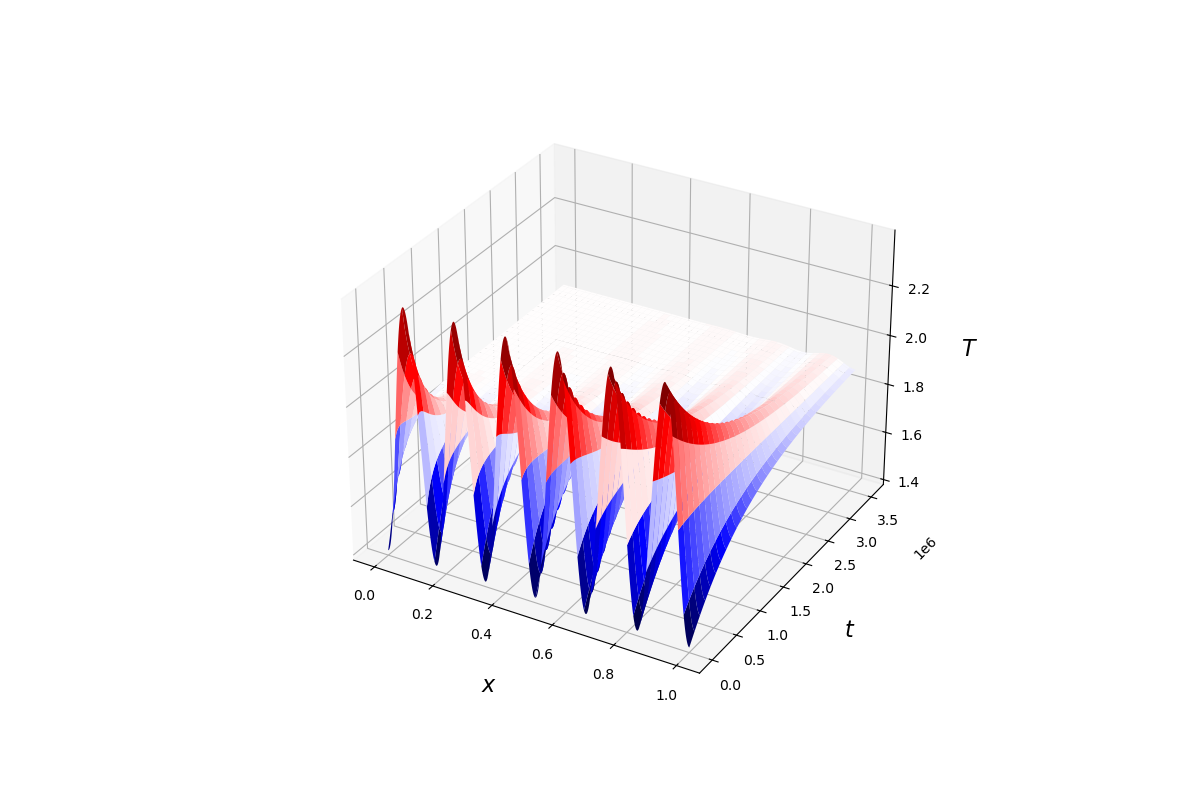

In [10]:
T = pd.DataFrame(results)
hc.evolutionField(T[T.columns[:]], r'$T$')

## Second demo - Dirac distribution
$T(x_0)$ = 100 \
$T(x) = 1$    $\forall x \neq x_0$ \
$\alpha$ = 1\
$\beta$ = 0 \
$n_e$ = 1 \
Neumann boundary condition

Heat Conduction Solver
 [Step] [Time] [Iter] [Residue] [Newton outcome] [Max beta] [Max alpha] [Minimal T] [Maximal T] [meanEnergy]
[  1 ] [3.54E-05 ] [ 2 ] [0.00E+00 ] [7.70E-17 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.00E+02 ] [1.6485000000000001E+00 ]
[  2 ] [7.07E-05 ] [ 2 ] [0.00E+00 ] [1.17E-15 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.12E+01 ] [1.6485000000000001E+00 ]
[  3 ] [1.06E-04 ] [ 2 ] [1.35E-16 ] [1.33E-14 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [6.13E+00 ] [1.6484999999999999E+00 ]
[  4 ] [1.41E-04 ] [ 2 ] [1.35E-16 ] [3.00E-14 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [4.83E+00 ] [1.6485000000000001E+00 ]
[  5 ] [1.77E-04 ] [ 2 ] [0.00E+00 ] [4.17E-14 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [4.19E+00 ] [1.6485000000000001E+00 ]
[  6 ] [2.12E-04 ] [ 2 ] [0.00E+00 ] [6.27E-14 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [3.79E+00 ] [1.6485000000000001E+00 ]
[  7 ] [2.47E-04 ] [ 2 ] [0.00E+00 ] [9.34E-14 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [3.51E+00 ] [1.6485000000000001E+00 ]
[  8 ] 

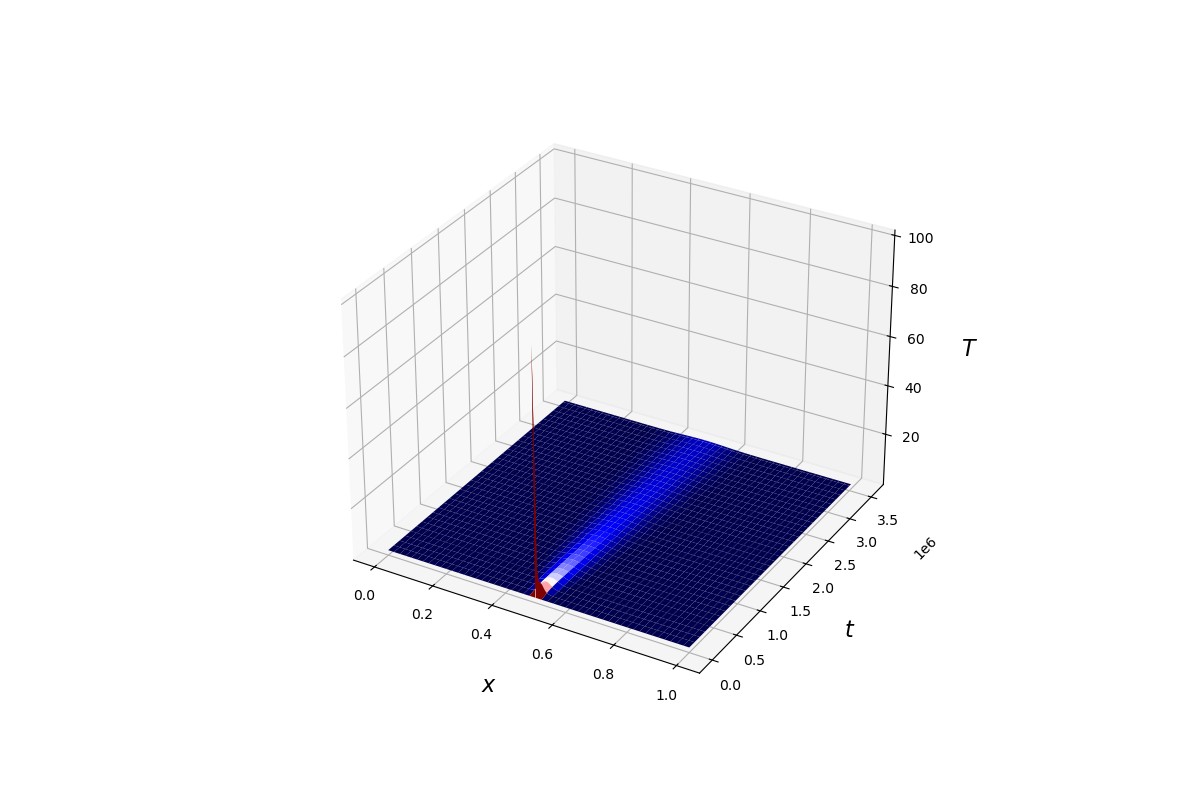

In [12]:
para['InitTeProfile'] = np.linspace(1, 1, para['numberOfNode'])
para['InitTeProfile'][500] = 100
para['InitneProfile'] = np.linspace(1, 1, para['numberOfNode'])
para['alphas'] =  np.linspace(1, 1, para['numberOfNode']) 
para['betas'] = np.linspace(0, 0, para['numberOfNode'])

results, cache = hc.solve(para)

T = pd.DataFrame(results)
hc.evolutionField(T[T.columns[:]], r'$T$')

## Third demo - "shockwave"

$T(x)$ = 1 $\forall x \leq x_0$ \
$T(x) = 10 $    $\forall x \geq x_0$ \
$\alpha$ = 1\
$\beta$ = 0 \
$n_e$ = 1 \
Neumann boundary condition

Heat Conduction Solver
 [Step] [Time] [Iter] [Residue] [Newton outcome] [Max beta] [Max alpha] [Minimal T] [Maximal T] [meanEnergy]
[  1 ] [3.54E-05 ] [ 2 ] [0.00E+00 ] [1.38E-15 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.00E+01 ] [8.2500000000000000E+00 ]
[  2 ] [7.07E-05 ] [ 2 ] [0.00E+00 ] [4.39E-14 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.00E+01 ] [8.2500000000000000E+00 ]
[  3 ] [1.06E-04 ] [ 2 ] [0.00E+00 ] [1.17E-13 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.00E+01 ] [8.2500000000000000E+00 ]
[  4 ] [1.41E-04 ] [ 2 ] [0.00E+00 ] [2.11E-13 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.00E+01 ] [8.2500000000000000E+00 ]
[  5 ] [1.77E-04 ] [ 2 ] [0.00E+00 ] [2.70E-13 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.00E+01 ] [8.2500000000000000E+00 ]
[  6 ] [2.12E-04 ] [ 2 ] [0.00E+00 ] [3.18E-13 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.00E+01 ] [8.2500000000000000E+00 ]
[  7 ] [2.47E-04 ] [ 2 ] [0.00E+00 ] [3.87E-13 ] [0.00E+00 ] [1.00E+00 ] [1.00E+00 ] [1.00E+01 ] [8.2500000000000000E+00 ]
[  8 ] 

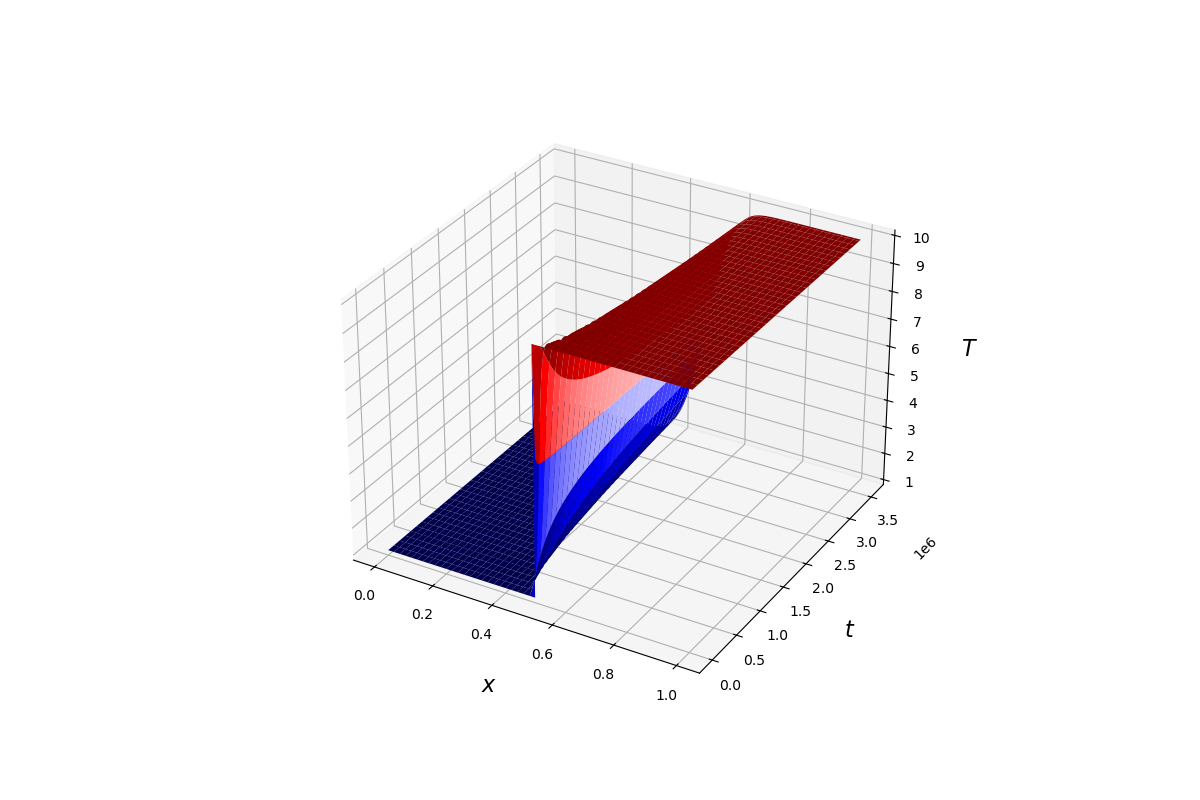

In [13]:
para['InitTeProfile'] = np.linspace(1, 1, para['numberOfNode'])
para['InitTeProfile'][500:] = 10

results, cache = hc.solve(para)

T = pd.DataFrame(results)
hc.evolutionField(T[T.columns[:]], r'$T$')

# Fourth demo - non linear heat conduction with Dirichlet boundary condition
$\alpha$ = 1\
$\beta$ is linearly descending from 2.5 to 0\
$n_e$ = 1 

Heat Conduction Solver
 [Step] [Time] [Iter] [Residue] [Newton outcome] [Minimal T] [Maximal T] [meanEnergy]
[  1 ] [3.54E-05 ] [10 ] [1.62E-02 ] [1.61E-10 ] [1.00E+01 ] [2.00E+01 ] [2.2863850369303574E+01 ]
[  2 ] [7.07E-05 ] [10 ] [1.28E-02 ] [2.16E-10 ] [1.00E+01 ] [2.00E+01 ] [2.3156589351510576E+01 ]
[  3 ] [1.06E-04 ] [10 ] [1.04E-02 ] [2.73E-10 ] [1.00E+01 ] [2.00E+01 ] [2.3397341762017756E+01 ]
[  4 ] [1.41E-04 ] [10 ] [8.49E-03 ] [3.33E-10 ] [1.00E+01 ] [2.00E+01 ] [2.3595890977253781E+01 ]
[  5 ] [1.77E-04 ] [10 ] [6.92E-03 ] [4.37E-10 ] [1.00E+01 ] [2.00E+01 ] [2.3759201355190861E+01 ]
[  6 ] [2.12E-04 ] [10 ] [5.63E-03 ] [5.40E-10 ] [1.00E+01 ] [2.00E+01 ] [2.3892992020183854E+01 ]
[  7 ] [2.47E-04 ] [10 ] [4.57E-03 ] [6.03E-10 ] [1.00E+01 ] [2.00E+01 ] [2.4002171973793995E+01 ]
[  8 ] [2.83E-04 ] [10 ] [3.70E-03 ] [7.94E-10 ] [1.00E+01 ] [2.00E+01 ] [2.4090969251175796E+01 ]
[  9 ] [3.18E-04 ] [10 ] [2.99E-03 ] [9.56E-10 ] [1.00E+01 ] [2.00E+01 ] [2.4162990822241095E+01 ]


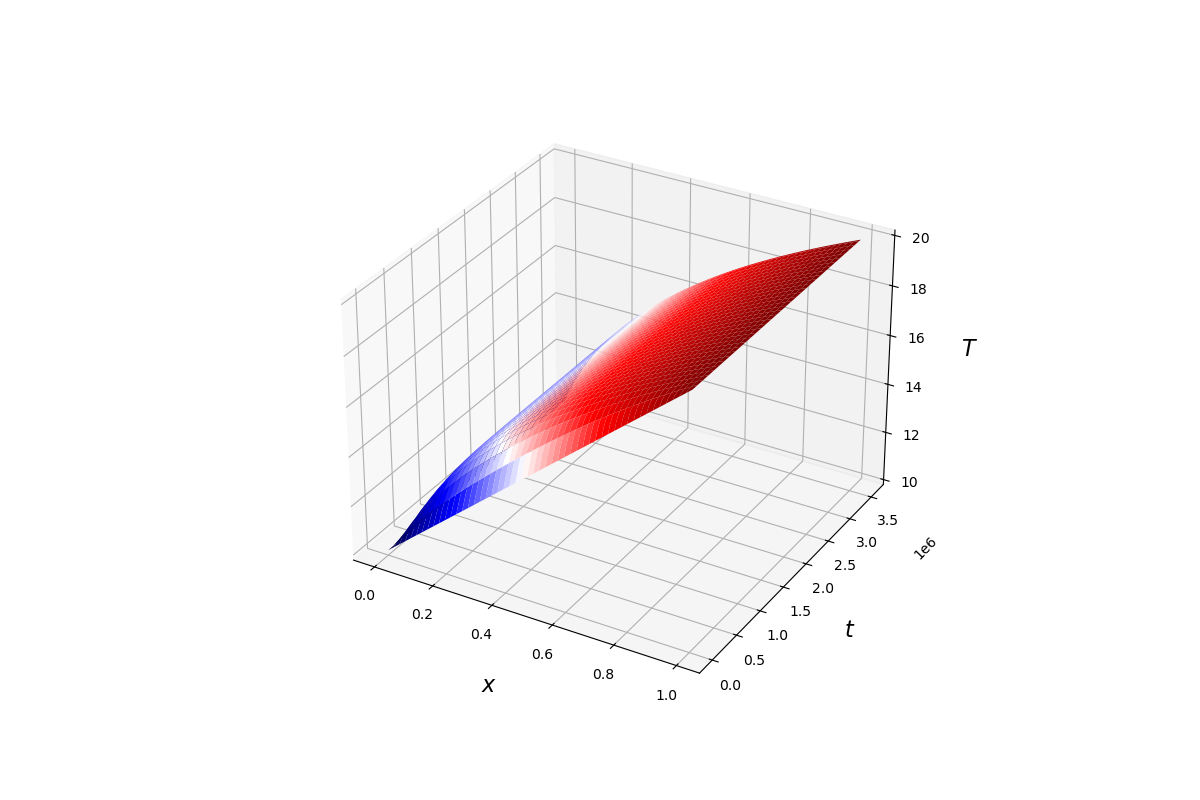

In [5]:
para['InitTeProfile'] = np.linspace(10, 20, para['numberOfNode'])
para['alphas'] =  np.linspace(1, 1, para['numberOfNode']) 
para['betas'] = np.linspace(2.5, 2.5, para['numberOfNode'])


para['x=0 type'] = 'fixedTemperature' #'heatFlux' - Neumann or 'fixedTemperature' - Dirichlet
para['x=0 value'] = 10
para['x=L type'] = 'fixedTemperature' #'heatFlux' - Neumann or 'fixedTemperature' - Dirichlet
para['x=L value'] = 20

para['maxIteration'] = 10 #Standard break condition is implemented for Neumann b.c. 

results, cache = hc.solve(para)

T = pd.DataFrame(results)
hc.evolutionField(T[T.columns[:]], r'$T$')